In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats as st
from scipy.stats import wilcoxon
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam

## Reading Data & EDA

In [2]:
df = pd.read_csv('Final_dataset_cleaned.csv')

In [3]:
df.shape

(57115, 35)

In [4]:
df.head()

,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,months_remaining,flat_type_coded,storey_range_coded,time_to_cbd,MRT?,time_to_cbd_from_flat,Matured Estate?,CPI,SORA,GDP_Q-1
0,0,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,...,769,2,1,28,1,31.496032,1,100.469,0.2641,121524.4
1,1,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,...,769,2,3,28,1,31.496032,1,100.469,0.2641,121524.4
2,2,2021-01,ANG MO KIO,3 ROOM,331,ANG MO KIO AVE 1,04 TO 06,68.0,New Generation,1981,...,708,3,2,24,1,37.344752,1,100.469,0.2641,121524.4
3,3,2021-01,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,...,698,3,2,24,1,34.177720,1,100.469,0.2641,121524.4
4,4,2021-01,ANG MO KIO,3 ROOM,561,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1980,...,697,3,1,24,1,37.814868,1,100.469,0.2641,121524.4


In [5]:
#Rename First "Unnamed Column" to Flat_ID
df.rename(columns = {'Unnamed: 0': 'Flat_ID'}, inplace = True)
df.head()

,Flat_ID,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,months_remaining,flat_type_coded,storey_range_coded,time_to_cbd,MRT?,time_to_cbd_from_flat,Matured Estate?,CPI,SORA,GDP_Q-1
0,0,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,...,769,2,1,28,1,31.496032,1,100.469,0.2641,121524.4
1,1,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,...,769,2,3,28,1,31.496032,1,100.469,0.2641,121524.4
2,2,2021-01,ANG MO KIO,3 ROOM,331,ANG MO KIO AVE 1,04 TO 06,68.0,New Generation,1981,...,708,3,2,24,1,37.344752,1,100.469,0.2641,121524.4
3,3,2021-01,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,...,698,3,2,24,1,34.177720,1,100.469,0.2641,121524.4
4,4,2021-01,ANG MO KIO,3 ROOM,561,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1980,...,697,3,1,24,1,37.814868,1,100.469,0.2641,121524.4


In [6]:
#Confirm no missing values
df.isna().sum()

Flat_ID                    0
month                      0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
remaining_lease            0
resale_price               0
blk_street                 0
html_search_format         0
Latitude                   0
Longitude                  0
num_results                0
Nearest Mall               0
Dist to Nearest Mall       0
Nearest Pri Sch            0
Dist to Nearest Pri Sch    0
Nearest Mrt/Lrt            0
Dist to Nearest Mrt/Lrt    0
Nearest Park               0
Dist to Nearest Park       0
months_remaining           0
flat_type_coded            0
storey_range_coded         0
time_to_cbd                0
MRT?                       0
time_to_cbd_from_flat      0
Matured Estate?            0
CPI                        0
SORA                       0
GDP_Q-1       

In [7]:
df.describe()

,Flat_ID,floor_area_sqm,lease_commence_date,resale_price,Latitude,Longitude,num_results,Dist to Nearest Mall,Dist to Nearest Pri Sch,Dist to Nearest Mrt/Lrt,...,months_remaining,flat_type_coded,storey_range_coded,time_to_cbd,MRT?,time_to_cbd_from_flat,Matured Estate?,CPI,SORA,GDP_Q-1
count,57115.000000,57115.000000,57115.000000,5.711500e+04,57115.000000,57115.000000,57115.000000,57115.000000,57115.000000,57115.000000,...,57115.000000,57115.000000,57115.000000,57115.000000,57115.000000,57115.000000,57115.000000,57115.000000,57115.000000,57115.000000
mean,28557.000000,97.586743,1997.141539,5.306416e+05,1.367245,103.845422,1.193067,1.052384,0.414442,0.631293,...,895.979235,4.226648,3.319531,33.300341,0.754635,42.769732,0.426946,104.987203,0.978365,127014.168148
std,16487.824649,23.745608,14.421961,1.675465e+05,0.042265,0.070373,0.472518,1.153739,0.239154,0.409125,...,173.891613,1.080529,2.056476,11.340133,0.430307,12.067177,0.494639,3.646185,1.188767,3334.481743
min,0.000000,31.000000,1966.000000,1.800000e+05,1.270380,103.685228,1.000000,0.000000,0.042776,0.002237,...,516.000000,1.000000,1.000000,0.000000,0.000000,2.510610,0.000000,100.440000,0.129000,121524.400000
25%,14278.500000,83.000000,1985.000000,4.140000e+05,1.336582,103.790454,1.000000,0.402437,0.242480,0.315357,...,750.000000,4.000000,2.000000,24.000000,1.000000,34.675206,0.000000,101.870000,0.179900,124181.100000
50%,28557.000000,93.000000,1997.000000,5.020000e+05,1.369285,103.850793,1.000000,0.649827,0.371072,0.543730,...,897.000000,4.000000,3.000000,33.000000,1.000000,44.551689,0.000000,104.439000,0.264100,129229.400000
75%,42835.500000,113.000000,2013.000000,6.200000e+05,1.396272,103.900965,1.000000,1.053524,0.533925,0.844733,...,1087.000000,5.000000,4.000000,44.000000,1.000000,51.574795,1.000000,108.671000,1.795400,129752.200000
max,57114.000000,243.000000,2019.000000,1.418000e+06,1.457071,103.987463,10.000000,8.292485,3.309224,3.501640,...,1169.000000,7.000000,17.000000,53.000000,1.000000,96.524600,1.000000,111.397000,3.595600,132329.600000


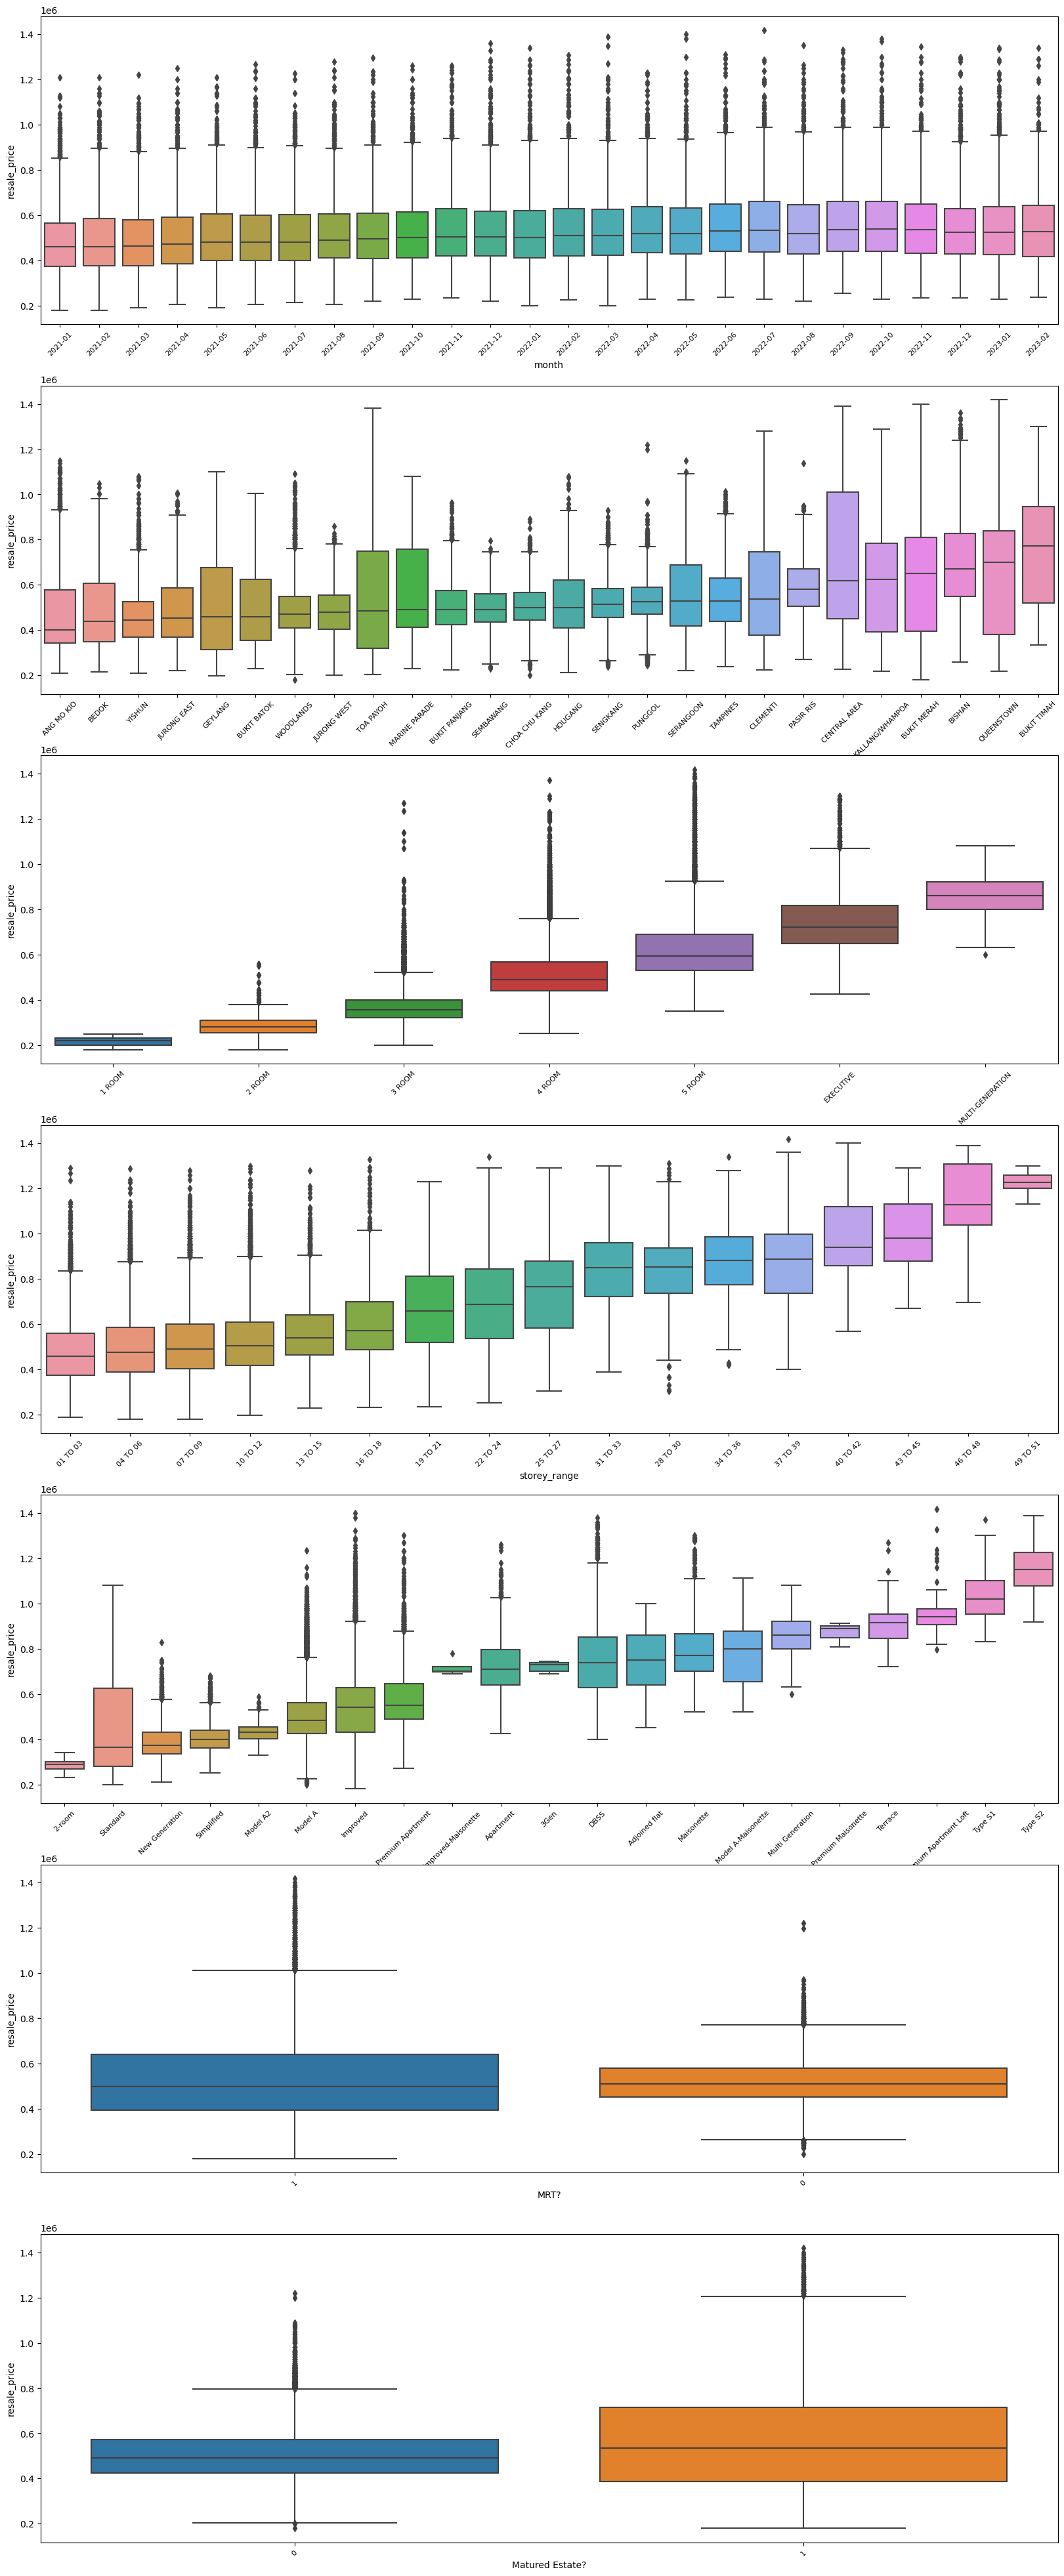

In [8]:
#Plot Features

#visualizing categorical variables vs price

'''
Prices are generally higher for bigger flat types, higher storey ranges, and flats in matured estates.
Interestingly, resale prices appear relatively flat over this 2+ year period. 
'''
fig, axs = plt.subplots(7, 1, figsize=(20,50))

for i, j in enumerate(['month', 'town', 'flat_type', 'storey_range', 'flat_model', 'MRT?', 'Matured Estate?']):
    if j != 'month':
        order = df.groupby(j)['resale_price'].median().reset_index().sort_values('resale_price')[j].tolist()
        sns.boxplot(x = df[j], y = df['resale_price'], ax = axs[i], order = order)
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, fontsize = 8)
    else:
        sns.boxplot(x = df[j], y = df['resale_price'], ax = axs[i])
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, fontsize = 8)

plt.show()


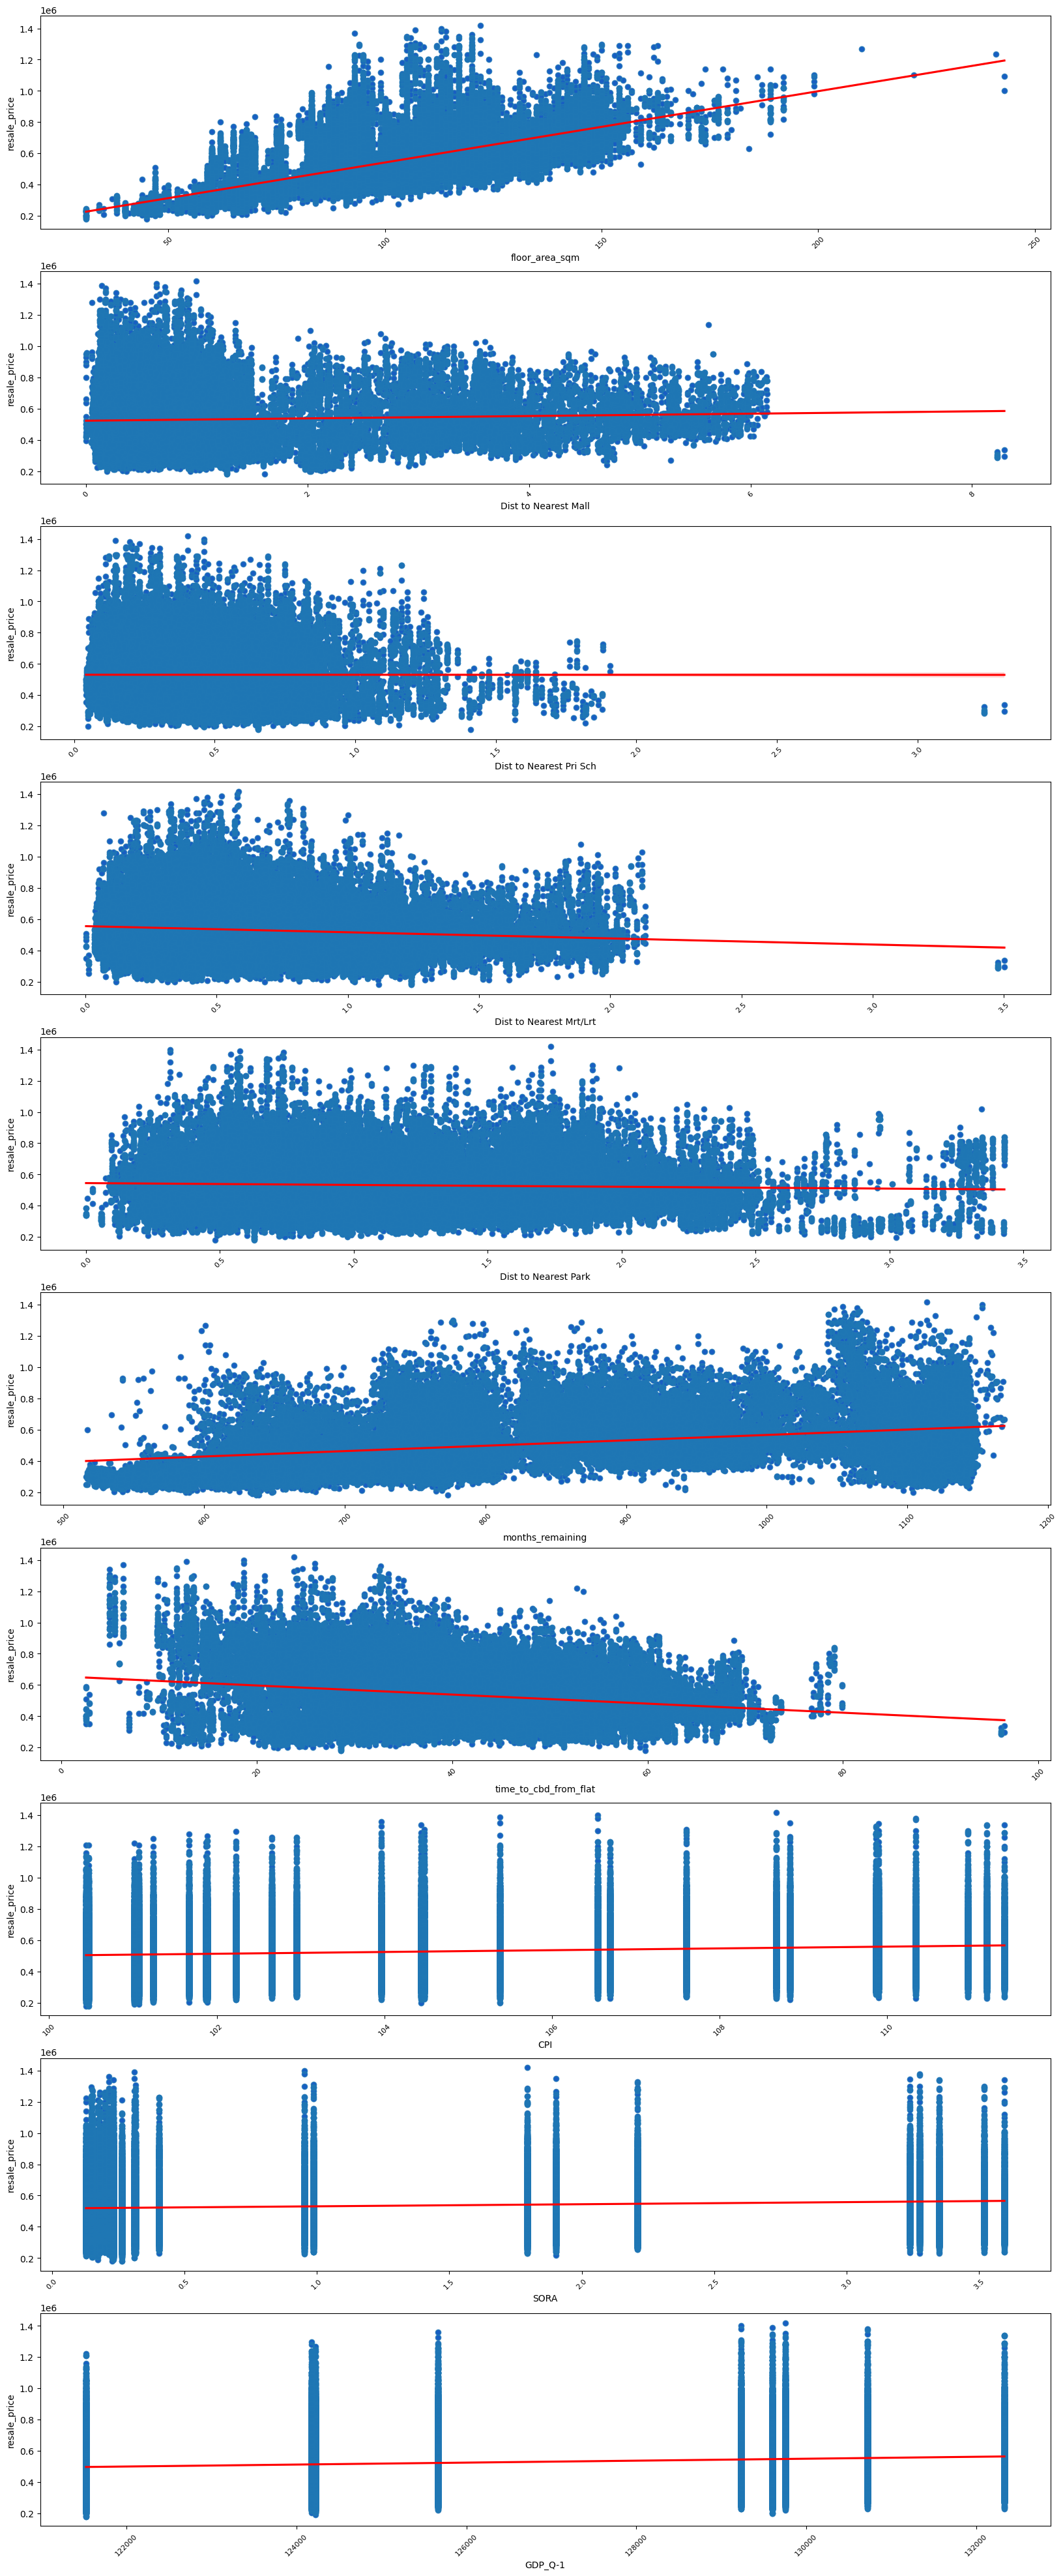

In [9]:
#Visualizing numerical variables vs price

'''
Prices are generally higher for bigger (bigger floor area) and newer flats (longer months remaining), 
for flats nearer to MRT/LRTs and for flats with shorter time_to_cbd.

'''

fig, axs = plt.subplots(10, 1, figsize=(20,50))

for i, j in enumerate(['floor_area_sqm', 'Dist to Nearest Mall', 'Dist to Nearest Pri Sch', 'Dist to Nearest Mrt/Lrt',\
                       'Dist to Nearest Park', 'months_remaining', 'time_to_cbd_from_flat', 'CPI', 'SORA', 'GDP_Q-1']):
    sns.scatterplot(x = df[j], y = df['resale_price'], color = 'blue', ax = axs[i])
    sns.regplot(x = df[j], y = df['resale_price'], line_kws={'color': 'red'}, ax = axs[i])
    axs[i].tick_params(axis = 'x', rotation=45, labelsize = 8)

plt.show()

<Axes: >

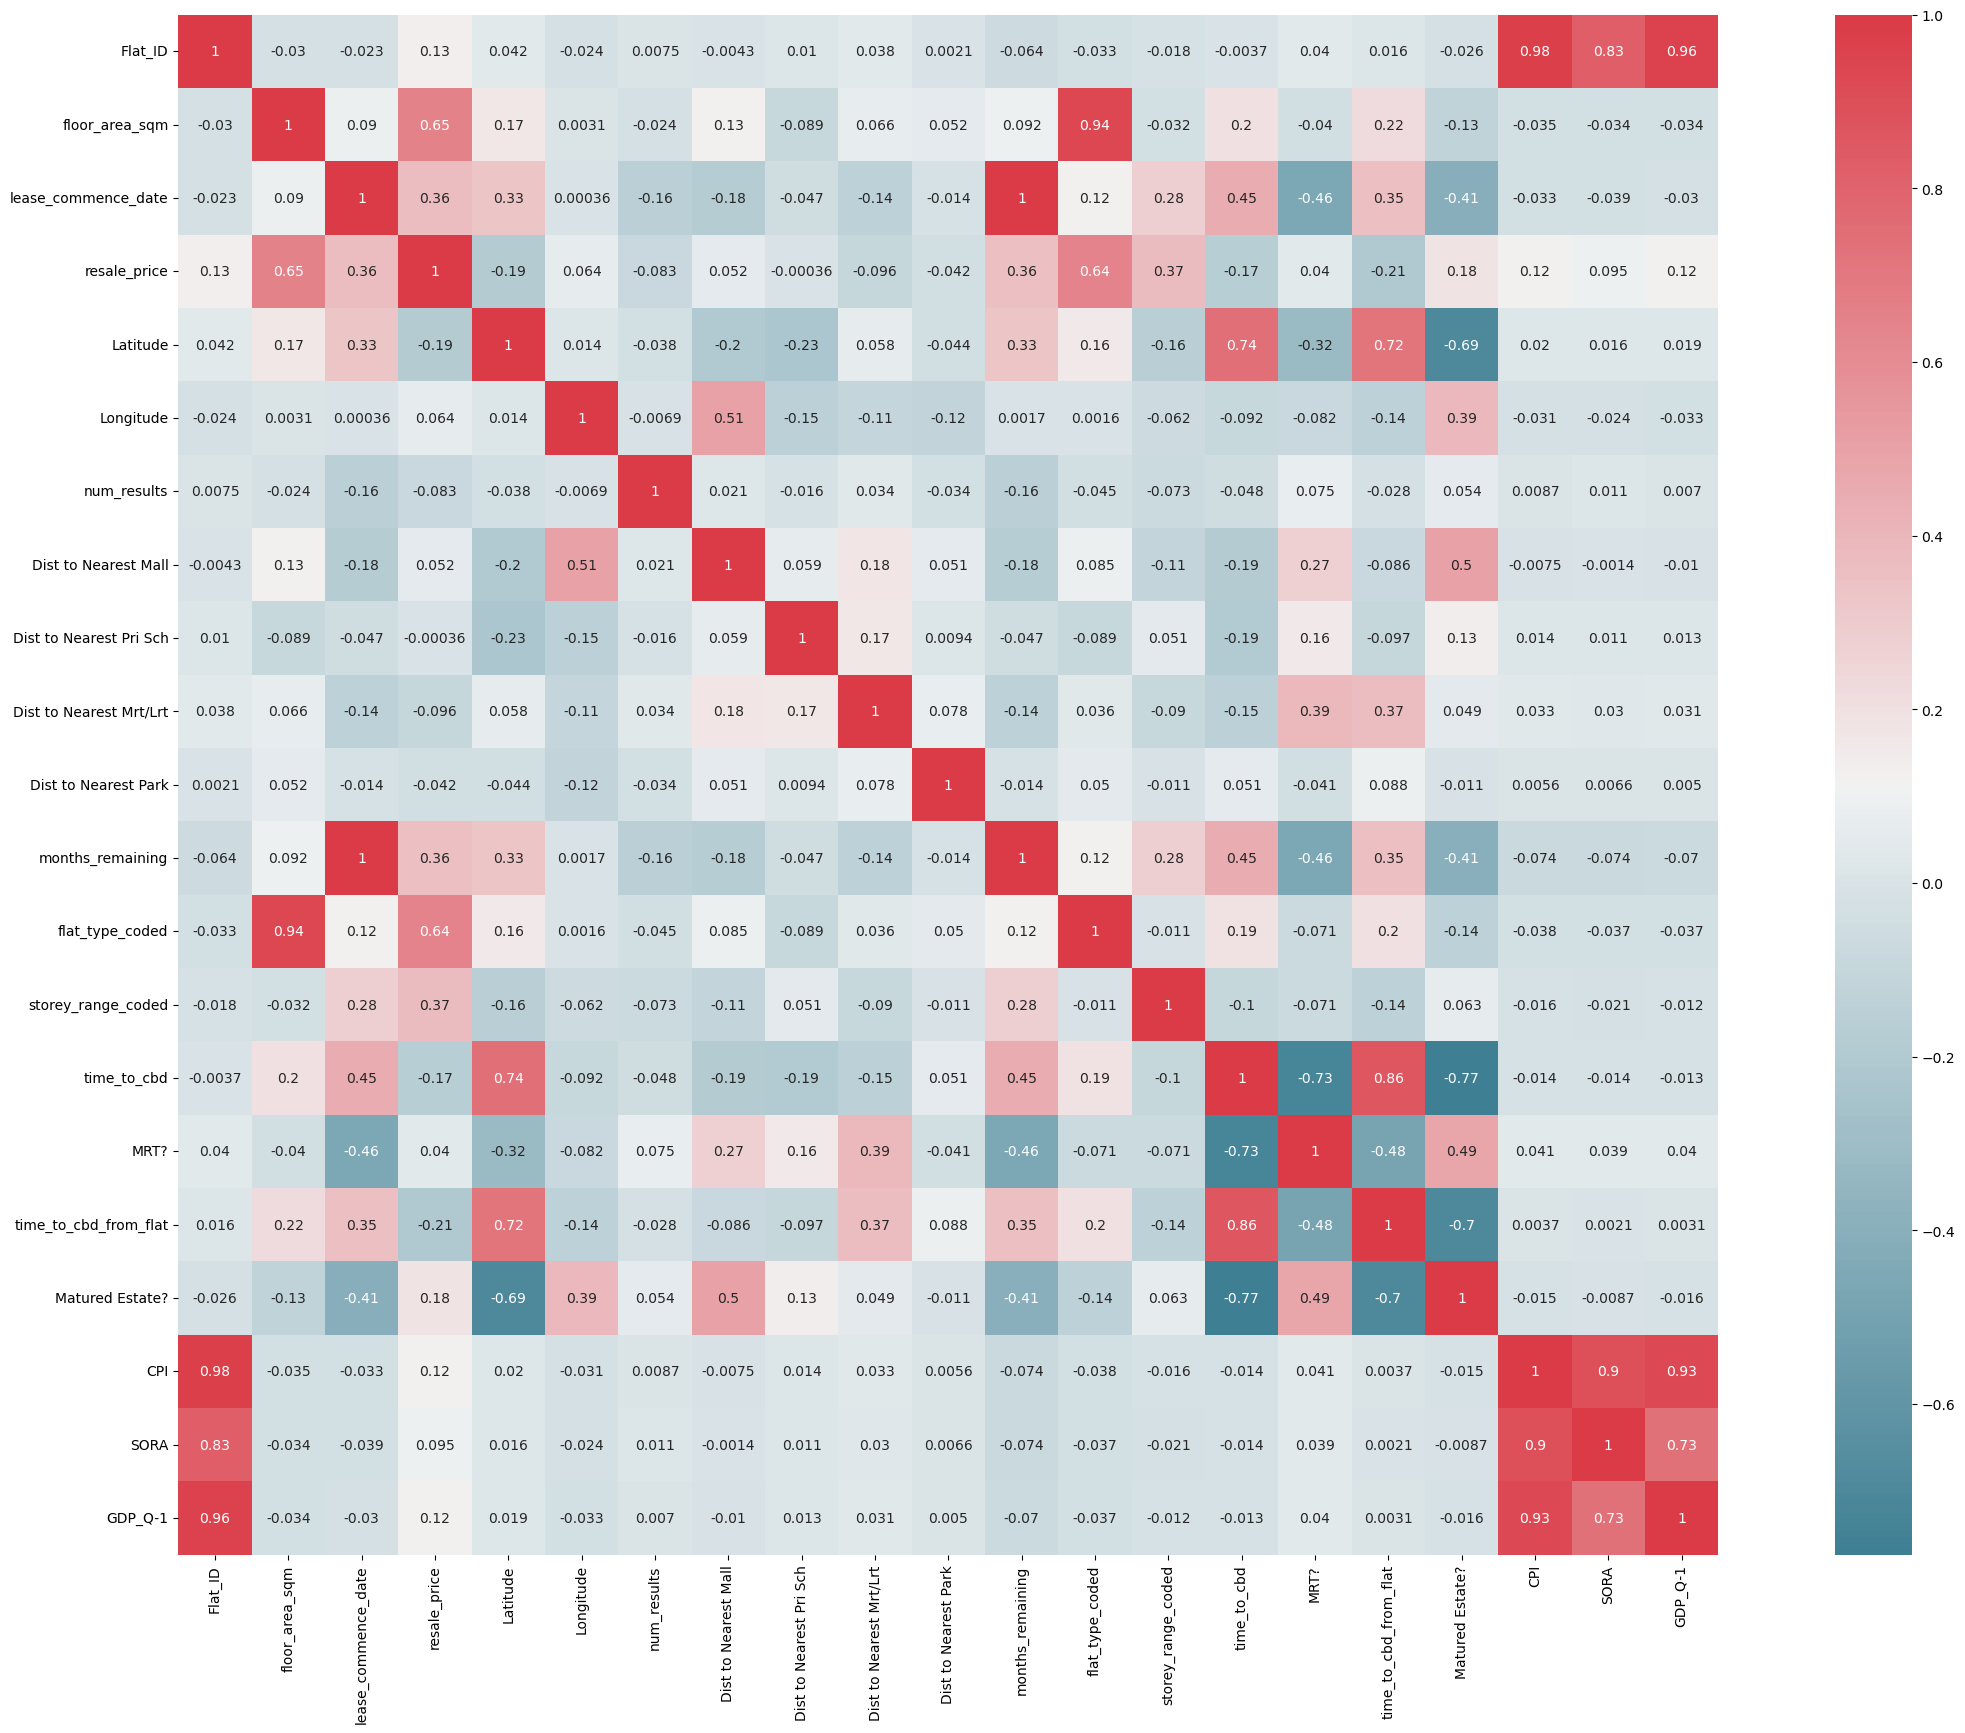

In [10]:
df1 = df.select_dtypes(exclude=['object'])

#checking multicollinearity 
corr_mat = df1.corr()
fig,ax = plt.subplots(figsize=(30,20))
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
sns.heatmap(corr_mat,vmax=1,square=True, cmap=cmap, annot=True)

## Extract Relevant Features for ML Models

For the predictive ML, we will use the features 'month', 'town', 'flat_type_coded', 'storey_range_coded', 'floor_area_sqm', 'flat_model', 'Dist to Nearest Mall', 'Dist to Nearest Pri Sch', 'Dist to Nearest MRT/Lrt', 'Dist to Nearest Park', 'months_remaining', 'MRT?', 'time_to_cbd_from_flat', 'Matured_estate?', 'CPI', 'SORA' and 'GDP_Q-1'. While there is some multicollinearity observed between these variables, this may not pose an issue as the main purpose is prediction (Applied Linear Statistical Models, Kutner et al., p. 283). 

Before running the ML models, let's convert our categorical variables to numerical variables first.

**Convert Categorical Variables (month + town + flat_model) to Numerical Variables**

In [11]:
#Convert Month (string) to Year & Month (integer)
df2 = df.copy()
df2['month'] = pd.to_datetime(df2['month'])
df2['year'] = df2['month'].dt.year.astype(int)
df2['month'] = df2['month'].dt.month.astype(int)
df2.head()

,Flat_ID,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,flat_type_coded,storey_range_coded,time_to_cbd,MRT?,time_to_cbd_from_flat,Matured Estate?,CPI,SORA,GDP_Q-1,year
0,0,1,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,...,2,1,28,1,31.496032,1,100.469,0.2641,121524.4,2021
1,1,1,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,...,2,3,28,1,31.496032,1,100.469,0.2641,121524.4,2021
2,2,1,ANG MO KIO,3 ROOM,331,ANG MO KIO AVE 1,04 TO 06,68.0,New Generation,1981,...,3,2,24,1,37.344752,1,100.469,0.2641,121524.4,2021
3,3,1,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,...,3,2,24,1,34.177720,1,100.469,0.2641,121524.4,2021
4,4,1,ANG MO KIO,3 ROOM,561,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1980,...,3,1,24,1,37.814868,1,100.469,0.2641,121524.4,2021


In [12]:
#Perform One-hot encoding for town & flat_model

one_hot_encoded = pd.get_dummies(df2[['town', 'flat_model']])
df2 = pd.concat([df2, one_hot_encoded], axis = 1)
df2.drop(['town', 'flat_model'], axis = 1)
df2.head()

,Flat_ID,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,0,1,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,...,0,0,0,0,0,0,0,0,0,0
1,1,1,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,...,0,0,0,0,0,0,0,0,0,0
2,2,1,ANG MO KIO,3 ROOM,331,ANG MO KIO AVE 1,04 TO 06,68.0,New Generation,1981,...,0,1,0,0,0,0,0,0,0,0
3,3,1,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,...,0,1,0,0,0,0,0,0,0,0
4,4,1,ANG MO KIO,3 ROOM,561,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1980,...,0,1,0,0,0,0,0,0,0,0


In [13]:
one_hot_encoded.columns

Index(['town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK',
       'town_BUKIT MERAH', 'town_BUKIT PANJANG', 'town_BUKIT TIMAH',
       'town_CENTRAL AREA', 'town_CHOA CHU KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
       'town_KALLANG/WHAMPOA', 'town_MARINE PARADE', 'town_PASIR RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
       'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS',
       'town_YISHUN', 'flat_model_2-room', 'flat_model_3Gen',
       'flat_model_Adjoined flat', 'flat_model_Apartment', 'flat_model_DBSS',
       'flat_model_Improved', 'flat_model_Improved-Maisonette',
       'flat_model_Maisonette', 'flat_model_Model A',
       'flat_model_Model A-Maisonette', 'flat_model_Model A2',
       'flat_model_Multi Generation', 'flat_model_New Generation',
       'flat_model_Premium Apartment', 'flat_model_Premium Apartment Loft',
       'flat_model_P

In [14]:
'''
Extract Relevant X Columns - month, town, flat_type_coded, storey_range_coded, floor_area_sqm, flat_model, 
Dist to Nearest Mall, Dist to Nearest Pri Sch, Dist to Nearest Mrt/Lrt, Dist to Nearest Park, months_remaining, 
MRT?, time_to_cbd_from_flat, Matured_estate?, CPI, SORA, GDP_Q-1, town (one-hot encoded) + flat_model (one-hot encoded)
Extract Relevant Y Columns - Resale_price (Y)
'''

X = df2[['month', 'year', 'flat_type_coded', 'storey_range_coded', 'floor_area_sqm', 'Dist to Nearest Mall', \
         'Dist to Nearest Pri Sch', 'Dist to Nearest Mrt/Lrt', 'Dist to Nearest Park', 'months_remaining',\
       'MRT?', 'time_to_cbd_from_flat', 'Matured Estate?', 'CPI', 'SORA', 'GDP_Q-1'] + [col for col in one_hot_encoded.columns]]
Y = df2['resale_price']

In [15]:
#Create Train-Test Set

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 123, test_size = 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45692, 63) (11423, 63) (45692,) (11423,)


In [16]:
#Create Scaled Train-Test Set

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Predictive Models

In [17]:
#Linear Regression

linear_reg = LinearRegression()

# fit the model to the data
linear_reg.fit(X_train_scaled, y_train)

# predict target variable for new data
y_trainpred = linear_reg.predict(X_train_scaled)
y_testpred = linear_reg.predict(X_test_scaled)

In [18]:
# Print performance statistics for LR Model

print("Train Mean squared error:", mean_squared_error(y_train, y_trainpred))
print("Train R-Squared:", r2_score(y_train, y_trainpred))
print("Test Mean squared error: ", mean_squared_error(y_test, y_testpred))
print("Test R-Squared:", r2_score(y_test, y_testpred))

Train Mean squared error: 2585817017.8139386
Train R-Squared: 0.908338056989803
Test Mean squared error:  2592732781.399934
Test R-Squared: 0.9057579016564818


In [19]:
#Lasso Regression

lasso = Lasso(random_state = 42)

lasso_grid = {'alpha': np.arange(0, 1, 0.01)}

# define search
lasso_params = GridSearchCV(lasso, lasso_grid, cv=5, n_jobs=-1)

# Fit grid search object search
lasso_params.fit(X_train_scaled, y_train)


KeyboardInterrupt



In [ ]:
# predict target variable for new data
lasso_best_model = lasso_params.best_estimator_
y_lasso_test_pred = lasso_best_model.predict(X_test_scaled)

# evaluate model performance using mean squared error and R-squared
lasso_mse = mean_squared_error(y_test, y_lasso_test_pred)
lasso_r2 = r2_score(y_test, y_lasso_test_pred)

# print model coefficients and mean squared error
print("Lasso best hyperparameters: ", lasso_params.best_params_)
print("CV Train Score:", lasso_params.best_score_)
print("Test Mean squared error: ", lasso_mse)
print("Test R-Squared:", lasso_r2)

In [ ]:
#Ridge Regression

ridge = Ridge(random_state = 42)

ridge_grid = {'alpha': np.arange(0, 1, 0.01)}

# define search
ridge_params = GridSearchCV(ridge, ridge_grid, cv=5, n_jobs=-1)

# Fit grid search object search
ridge_model = ridge_params.fit(X_train_scaled, y_train)

In [ ]:
# predict target variable for new data
ridge_best_model = ridge_params.best_estimator_
y_ridge_pred = ridge_best_model.predict(X_test_scaled)

# evaluate model performance using mean squared error and R-squared
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)

# print model coefficients and mean squared error
print("Ridge best hyperparameters: ", ridge_params.best_params_)
print("CV train score:", ridge_params.best_score_)
print("Test Mean squared error: ", ridge_mse)
print("Test R-Squared:", ridge_r2)

In [ ]:
#Random Forest

rfparam_grid = {
    'n_estimators': [250, 500, 750, 1000, 1500],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10]
}

# create a random forest regressor object
rf = RandomForestRegressor(random_state=42)

# create a grid search object
rf_params = RandomizedSearchCV(estimator=rf, param_distributions=rfparam_grid, cv=5, n_jobs=-1, random_state = 42)

# fit the grid search object to the training data
rf_params.fit(X_train_scaled, y_train)


In [ ]:
# predict the target variable for the test data using the best RF model
rf_best_model = rf_params.best_estimator_
rf_ytest_pred = rf_best_model.predict(X_test_scaled)

# calculate the mean squared error and R-squared value of the best RF model
rf_mse = mean_squared_error(y_test, rf_ytest_pred)
rf_r2 = r2_score(y_test, rf_ytest_pred)
print('Best parameters:', rf_params.best_params_)
print('Best CV train score:', rf_params.best_score_)
print('Mean squared error (test):', rf_mse)
print('R-squared value (test):', rf_r2)

In [ ]:
#XGBoost

# specify parameter ranges for hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [250, 500, 750, 1000],
    'max_depth': np.arange(3, 10),
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'subsample': np.linspace(0.5, 0.9, 5),
    'colsample_bytree': np.linspace(0.5, 0.9, 5),
    'gamma': [0, 0.25, 0.5, 0.75, 1]
}

# define XGBoost model to be used
xgb_model = xgb.XGBRegressor(random_state = 42)

# define grid search with 20 iterations and 5-fold cross-validation
xgb_params = RandomizedSearchCV(xgb_model, param_distributions= xgb_param_grid, n_iter=20, cv=5, n_jobs=-1, random_state=42)

# fit the randomized search to the data
xgb_params.fit(X_train_scaled, y_train)

# get the best parameters and best score from the grid search object
xgb_best_params = xgb_params.best_params_
xgb_best_score = xgb_params.best_score_


In [ ]:
xgb_best_model = xgb_params.best_estimator_
# predict the target variable for the test data using the best XGB model
xgb_ytest_pred = xgb_best_model.predict(X_test_scaled)

#calculate the mean squared error and R-squared value of the best model
xgb_mse = mean_squared_error(y_test, xgb_ytest_pred)
xgb_r2 = r2_score(y_test, xgb_ytest_pred)
print('Best parameters:', xgb_best_params)
print('Best CV train score:', xgb_best_score)
print('Mean squared error (test):', xgb_mse)
print('R-squared value (test):', xgb_r2)


In [ ]:
#Feature Importance 

importances = xgb_best_model.feature_importances_
feat_imp = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
print(feat_imp)
feat_imp.plot(x='feature', y='importance', kind='bar', title='Feature Importances', figsize = (20,6))
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

In [ ]:
#Neural Network (with R- Squared)

import tensorflow.keras.backend as K

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

# Define the neural network model
def create_model(learningrate = 0.05, n_layers = 1, neurons=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
    for i in range(n_layers - 1):
        model.add(Dense(neurons, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
    optimizer = Adam(learning_rate =learningrate)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics = [r_squared])
    return model

# Create a KerasRegressor object
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {'n_layers': [1,2,3], 'neurons': [5, 10, 15, 20, 25, 30], 'learningrate': [0.05, 0.01, 0.1, 0.2, 0.3]}

# Perform grid search using cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_result = grid.fit(X_train_scaled, y_train)


In [ ]:
# Train final model using the best hyperparameters
best_model = create_model(n_layers = grid_result.best_params_['n_layers'], neurons=grid_result.best_params_['neurons'], learningrate = grid_result.best_params_['learningrate'])
best_model.fit(X_train_scaled, y_train, epochs=50, batch_size= 32)

# Make predictions on the test set
nn_ytest_pred = best_model.predict(X_test_scaled)

# Calculate mean squared error and R-squared score
nn_mse = mean_squared_error(y_test, nn_ytest_pred)
nn_r2 = r2_score(y_test, nn_ytest_pred)

# Print results
print('Best CV train R-squared:', grid.best_score_)
print('Best Parameters:', grid.best_params_)
print("Mean squared error for Test:", nn_mse)
print("R-squared score for Test:", nn_r2)

## Monte-Carlo Cross-Validation (50 Rounds)

In [ ]:
#Perform Monte Carlo CV for all the models

Ridge_cv = []
Lasso_cv = []
rf_cv = []
xgb_cv = []
nn_cv = []

# Loop through the number of iterations
for i in range(50):
    # Create a random 80/20 train-test split
    X_cvtrain, X_cvtest, y_cvtrain, y_cvtest = train_test_split(X, Y, test_size=0.2)
    cv_sc = StandardScaler()
    X_cvtrain_scaled = cv_sc.fit_transform(X_cvtrain)
    X_cvtest_scaled = cv_sc.transform(X_cvtest)
    
    #Ridge Regression
    ridge_best_model.fit(X_cvtrain_scaled, y_cvtrain)
    ridge_cv_r2 = r2_score(y_cvtest, ridge_best_model.predict(X_cvtest_scaled))
    Ridge_cv.append(ridge_cv_r2)
    
    #Lasso Regression
    lasso_best_model.fit(X_cvtrain_scaled, y_cvtrain)
    lasso_cv_r2 = r2_score(y_cvtest, lasso_best_model.predict(X_cvtest_scaled))
    Lasso_cv.append(lasso_cv_r2)
    
    #Neural Network
    nn_best_model = create_model(n_layers = 3, neurons=25, learningrate = 0.2)
    nn_best_model.fit(X_cvtrain_scaled, y_cvtrain, epochs = 50, batch_size = 32)
    nn_cv_r2 = r2_score(y_cvtest, nn_best_model.predict(X_cvtest_scaled))
    nn_cv.append(nn_cv_r2)
    
    #Random Forest
    rf_best_model.fit(X_cvtrain_scaled, y_cvtrain)
    rf_cv_r2 = r2_score(y_cvtest, rf_best_model.predict(X_cvtest_scaled))
    rf_cv.append(rf_cv_r2)
    
    #XGBoost
    xgb_best_model.fit(X_cvtrain_scaled, y_cvtrain)
    xgb_cv_r2 = r2_score(y_cvtest, xgb_best_model.predict(X_cvtest_scaled))
    xgb_cv.append(xgb_cv_r2)


In [ ]:
# Loop through each model and print the mean and standard deviation of the test errors
## Note: There are some outlier observations for neural network, which results in its high standard deviation observed.

cv_errors = {'Ridge': Ridge_cv, 'Lasso': Lasso_cv, 'Neural Network': nn_cv, 'RF': rf_cv, 'XGBoost': xgb_cv}

for model_name, errors in cv_errors.items():
    mean_error = np.mean(errors)
    std_error = np.std(errors)
    print(f"{model_name} mean test error: {mean_error:.4f}, std dev: {std_error:.4f}")
    

In [ ]:
#observe 2 huge outlier values for NN model, which can affect accuracy of a paired t-test

fig, ax = plt.subplots()
bp = ax.boxplot(cv_errors.values())
ax.set_xticklabels(cv_errors.keys())
ax.set_ylabel('Monte-Carlo CV Scores')
ax.set_title('Boxplot of Monte-Carlo CV Scores')

plt.show()

In [ ]:
'''Confirmed that non-normality assumption is violated for NN model:
p-val < 0.05 which suggests to reject null hypothesis of normality'''

st.normaltest(nn_cv)

In [ ]:
'''Use a non-parametric Wilcoxon signed-rank test (due to the outliers and non-normality observed in NN model) 
to compare the test errors for each model'''

for key in dict(list(cv_errors.items())[:4]).keys():
    model1_name = key
    model2_name = 'XGBoost'
    _, pvalue = wilcoxon(cv_errors[model1_name], cv_errors[model2_name])
    print(f"{model1_name} vs {model2_name} p-value: {pvalue:.5f}")

## Re-train Model on Full Dataset 

In [20]:
#XGBoost Model trained on full set of data
X_scaled_combined = pd.concat([pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index), pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)])
y_combined = pd.concat([y_train, y_test])

xgb_combined_model = xgb.XGBRegressor(subsample = 0.9, n_estimators = 750, max_depth= 9, learning_rate= 0.05, gamma = 0, colsample_bytree = 0.7)
xgb_combined_model.fit(X_scaled_combined, y_combined)

combined_y_pred = xgb_combined_model.predict(X_scaled_combined)
print('R-Squared score of model (combined):', r2_score(combined_y_pred, y_combined))
print("Mean squared error (combined):", mean_squared_error(combined_y_pred, y_combined))

R-Squared score of model (combined): 0.9921939701429695
Mean squared error (combined): 215588436.88594902


In [21]:
import shap

C:\Users\ShaoWei\anaconda3\envs\cs6242\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
explainer = shap.TreeExplainer(xgb_combined_model)
shap_values = explainer.shap_values(X_scaled_combined)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


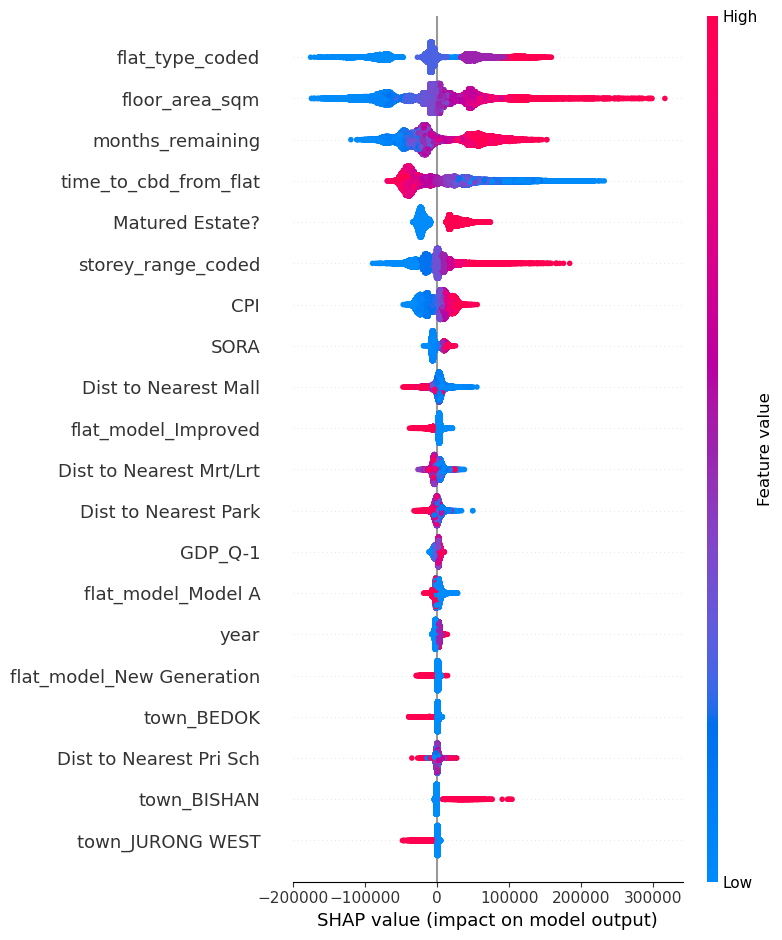

In [23]:
shap.summary_plot(shap_values, X_scaled_combined)

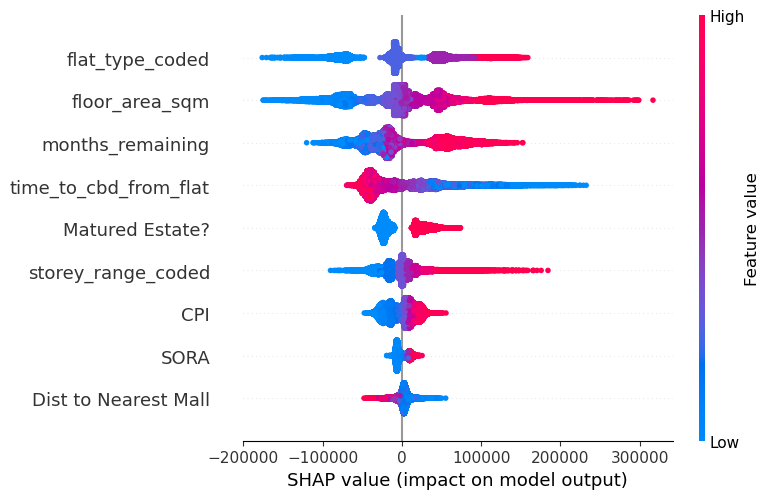

In [24]:
shap.summary_plot(shap_values, X_scaled_combined, max_display=9)

In [ ]:
X1 = X.copy()
y_combined = pd.concat([y_train, y_test])

X1 = pd.merge(X1, pd.DataFrame(combined_y_pred, columns = ['predicted_price'], index = y_combined.index), left_index = True, right_index = True)
X1 = pd.merge(X1, pd.DataFrame(y_combined, columns = ['resale_price'], index = y_combined.index), left_index = True, right_index = True)
X1[['resale_price', 'predicted_price']].head()


In [ ]:
#Add back remaining columns from original dataframe

df_left = df[['Flat_ID','flat_type', 'block', 'street_name', 'storey_range', 'lease_commence_date', 'remaining_lease', 'blk_street', 'html_search_format', 'Latitude', 'Longitude', 'num_results', 'Nearest Mall', 'Nearest Pri Sch', 'Nearest Mrt/Lrt', 'Nearest Park', 'time_to_cbd']]
X2 = pd.merge(X1, df_left, left_index = True, right_index = True)
X2 = X2.sort_index()

In [ ]:
#Function to undo one-hot encoding 

def melt_and_filter(df, prefix, new_name):
    #Identify dummy cols
    dummy_cols = df.filter(regex = f'^{prefix}')
    #Identify non-dummy cols (to keep)
    nondummy_cols = [x for x in df.columns if x not in dummy_cols]
    #Melt df to convert dummy col values into 1 column + value column (ie 0/1 based on one-hot encoding earlier)
    pd_melt = pd.melt(df, id_vars = nondummy_cols, value_vars = dummy_cols, var_name = new_name, value_name = 'indicator')
    #Filter to keep only rows with '1' value 
    df2 = pd_melt[pd_melt['indicator'] == 1].reset_index()
    #Drop value column, and remove prefix in the new created column (eg town_ANG MO KIO, remove 'town_')
    df2.drop(columns = 'indicator', inplace = True)
    df2[new_name] = df2[new_name].apply(lambda x: x.replace(prefix, '') if isinstance(x, str) else x)
    return df2

In [ ]:
X2 = melt_and_filter(X2, 'town_', 'town')
X2 = melt_and_filter(X2, 'flat_model_', 'flat_model')
X2.drop(columns = ['level_0', 'index'], inplace = True)
X2.reset_index(inplace = True, drop = True)
X2.head()

In [ ]:
X2['month'] = X2['year'].astype(str) + '-' + X2['month'].astype(str).str.zfill(2)
X2.drop(columns = ['year'], inplace = True)

In [ ]:
X2.sort_values(by = 'Flat_ID', inplace = True)
X2 = X2.reindex(columns = list(df.columns) + ['predicted_price'])
X2.head()

In [ ]:
#Export dataframe with predictions to Excel

X2.to_excel('Final_dataset w Predicted Prices (with retraining).xlsx', index = False)

## Computing OverValuation/UnderValuation

In [ ]:
#every month/year has flats in all towns, but not across all flat types
X2.groupby('month').agg({'town': 'nunique', 'flat_type_coded': 'nunique', 'Flat_ID': 'count'})

In [ ]:
#Find Mean Difference for each town + flat type (+ve: Undervalued, -ve: Overvalued)
df_meanval2 = X2.groupby(['town', 'flat_type']).agg({'predicted_price': 'mean', 'resale_price': 'mean'})
df_meanval2['mean_diff'] = df_meanval2['predicted_price'] - df_meanval2['resale_price']

In [ ]:
df_meanval2 = df_meanval2.reset_index()
df_meanval2_pivot = pd.pivot_table(df_meanval2, index=['town'], columns=['flat_type'], values='mean_diff',fill_value=0)

In [ ]:
#Function to Plot charts 

def plot_mean_diff_by_town(df, flat_type):
    # select the column for the specified flat_type
    col = df[flat_type].sort_values()
    # create a horizontal bar plot with colors based on diff columns values
    plt.barh(col.index, col, color=['red' if x<0 else 'green' for x in col])
    # add labels and title
    plt.xlabel('Mean Difference')
    plt.ylabel('Town')
    plt.title(f'Mean Difference by Town - {flat_type}')
    plt.show()

In [ ]:
#Over/UnderValuation for 4 Room Flats
plot_mean_diff_by_town(df_meanval2_pivot, '4 ROOM')

In [ ]:
plot_mean_diff_by_town(df_meanval2_pivot, '5 ROOM')

## Export Trained Model 

In [ ]:
import pickle
pickle.dump(xgb_combined_model, open("project_model.pickle.dat", "wb"))